In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
(t_x,t_y),(tt_x,tt_y) = keras.datasets.fashion_mnist.load_data()
s_t_x = t_x/255.0
s_tt_x = tt_x/255.0
t_x,v_x,t_y,v_y = train_test_split(s_t_x,t_y,test_size=0.2,random_state=42)
t_x.shape[1:]

(28, 28)

In [15]:
def s_my_m(l=None):
    m = keras.Sequential()
    m.add(keras.layers.Flatten(input_shape=(28,28)))
    if l:
        for i in l:
            m.add(i)
    m.add(keras.layers.Dense(10,activation='softmax'))
    m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')
    return m

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5913 - accuracy: 0.7943 - val_loss: 0.4440 - val_accuracy: 0.8364
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4434 - accuracy: 0.8390 - val_loss: 0.3858 - val_accuracy: 0.8587
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4072 - accuracy: 0.8525 - val_loss: 0.3721 - val_accuracy: 0.8667
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3864 - accuracy: 0.8596 - val_loss: 0.3699 - val_accuracy: 0.8654
Epoch 5/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3622 - accuracy: 0.8675 - val_loss: 0.3548 - val_accuracy: 0.8694
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3551 - accuracy: 0.8694 - val_loss: 0.3355 - val_accuracy: 0.8773
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3459 - accuracy: 0.8716 - val_loss: 0.3375 - val_accuracy:

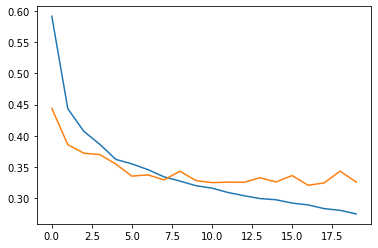

In [5]:
m = keras.Sequential()
m.add(keras.layers.Flatten(input_shape=(28,28)))
m.add(keras.layers.Dense(100,activation='relu'))
m.add(keras.layers.Dropout(0.3))
m.add(keras.layers.Dense(10,activation='softmax'))
#신경망의 구축
m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')
#콜백
ck_p = keras.callbacks.ModelCheckpoint('best_m.h',save_best_only=True) #callbacks.ModelCheckpoint
hy = m.fit(t_x,t_y,epochs=20,validation_data=(v_x,v_y),callbacks=[ck_p])
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])

In [10]:
m2 = keras.models.load_model('best_m.h')
m.evaluate(v_x,v_y)

375/375 [==============================] - 1s 1ms/step - loss: 0.3261 - accuracy: 0.8857


[0.32605722546577454, 0.8856666684150696]

In [9]:
m2.evaluate(v_x,v_y)

375/375 [==============================] - 1s 1ms/step - loss: 0.3209 - accuracy: 0.8852


[0.32087990641593933, 0.8851666450500488]

In [23]:
m1 = keras.Sequential()
m1.add(keras.layers.Flatten(input_shape=(28,28)))
m1.add(keras.layers.Dense(100,activation='relu'))
m1.add(keras.layers.Dropout(0.3))
m1.add(keras.layers.Dense(10,activation='softmax'))
m1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')
ck_p = keras.callbacks.ModelCheckpoint('best1_m.h5',save_best_only=True)
#keras.callbacks.ModelCheckpoint,save_best_only:최적의 모델을 체크포인트한다
e_st = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True) #EarlyStopping 중간에 멈춘다 (검증점수확인)
#patience=n : 연속적으로 성능이 n번동안 오르지 않을때 (변화가 없을때) 멈춘다 -> 멈출었을때 그전의 모델의 값이 최적의 값이 된다?
#restore_best_weights=True : 더 좋았던 모델의 형태를 사용
hy = m1.fit(t_x,t_y,epochs=20,validation_data=(v_x,v_y),callbacks=[ck_p,e_st])

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5932 - accuracy: 0.7902 - val_loss: 0.4293 - val_accuracy: 0.8448
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4369 - accuracy: 0.8424 - val_loss: 0.3818 - val_accuracy: 0.8617
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4027 - accuracy: 0.8549 - val_loss: 0.3602 - val_accuracy: 0.8702
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3792 - accuracy: 0.8619 - val_loss: 0.3570 - val_accuracy: 0.8727
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3633 - accuracy: 0.8672 - val_loss: 0.3696 - val_accuracy: 0.8659
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3537 - accuracy: 0.8703 - val_loss: 0.3444 - val_accuracy: 0.8727
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3436 - accuracy: 0.8730 - val_loss: 0.3307 - val_accuracy:

In [24]:
m1.evaluate(v_x,v_y)

375/375 [==============================] - 1s 1ms/step - loss: 0.3222 - accuracy: 0.8827


[0.3221658170223236, 0.8826666474342346]

In [25]:
m2 = keras.models.load_model('best1_m.h5')
m2.evaluate(v_x,v_y)

375/375 [==============================] - 1s 1ms/step - loss: 0.3222 - accuracy: 0.8827


[0.3221658170223236, 0.8826666474342346]

In [26]:
def sig(x):
    return 1/(1+np.exp(-x))

(-5.0, 5.0, -0.2, 1.2)

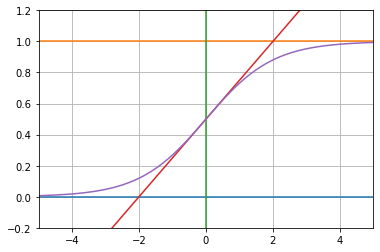

In [32]:
x=np.linspace(-5,5,200)
plt.plot([-5,5],[0,0])
plt.plot([-5,5],[1,1])
plt.plot([0,0],[-0.2,1.2])
plt.plot([-5,5],[-3/4,7/4])
plt.plot(x,sig(x))
plt.grid(True)
plt.axis([-5,5,-0.2,1.2])